In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data=pd.read_csv(r"c:\Users\komme\Downloads\traffic volume.csv")

In [3]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [7]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [ ]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

In [ ]:
from collections import Counter

In [ ]:
data['weather'].fillna('Clouds',inplace=True)

In [10]:
data.isnull().sum()

holiday           48143
temp                  0
rain                  0
snow                  0
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [12]:
le = LabelEncoder()

In [13]:
data['weather'] = le.fit_transform(data['weather'])

In [14]:
data['holiday'] = le.fit_transform(data['holiday'])

In [18]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,11,288.28,0.0,0.0,1,02-10-2012,09:00:00,5545
1,11,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,11,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,11,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,11,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918


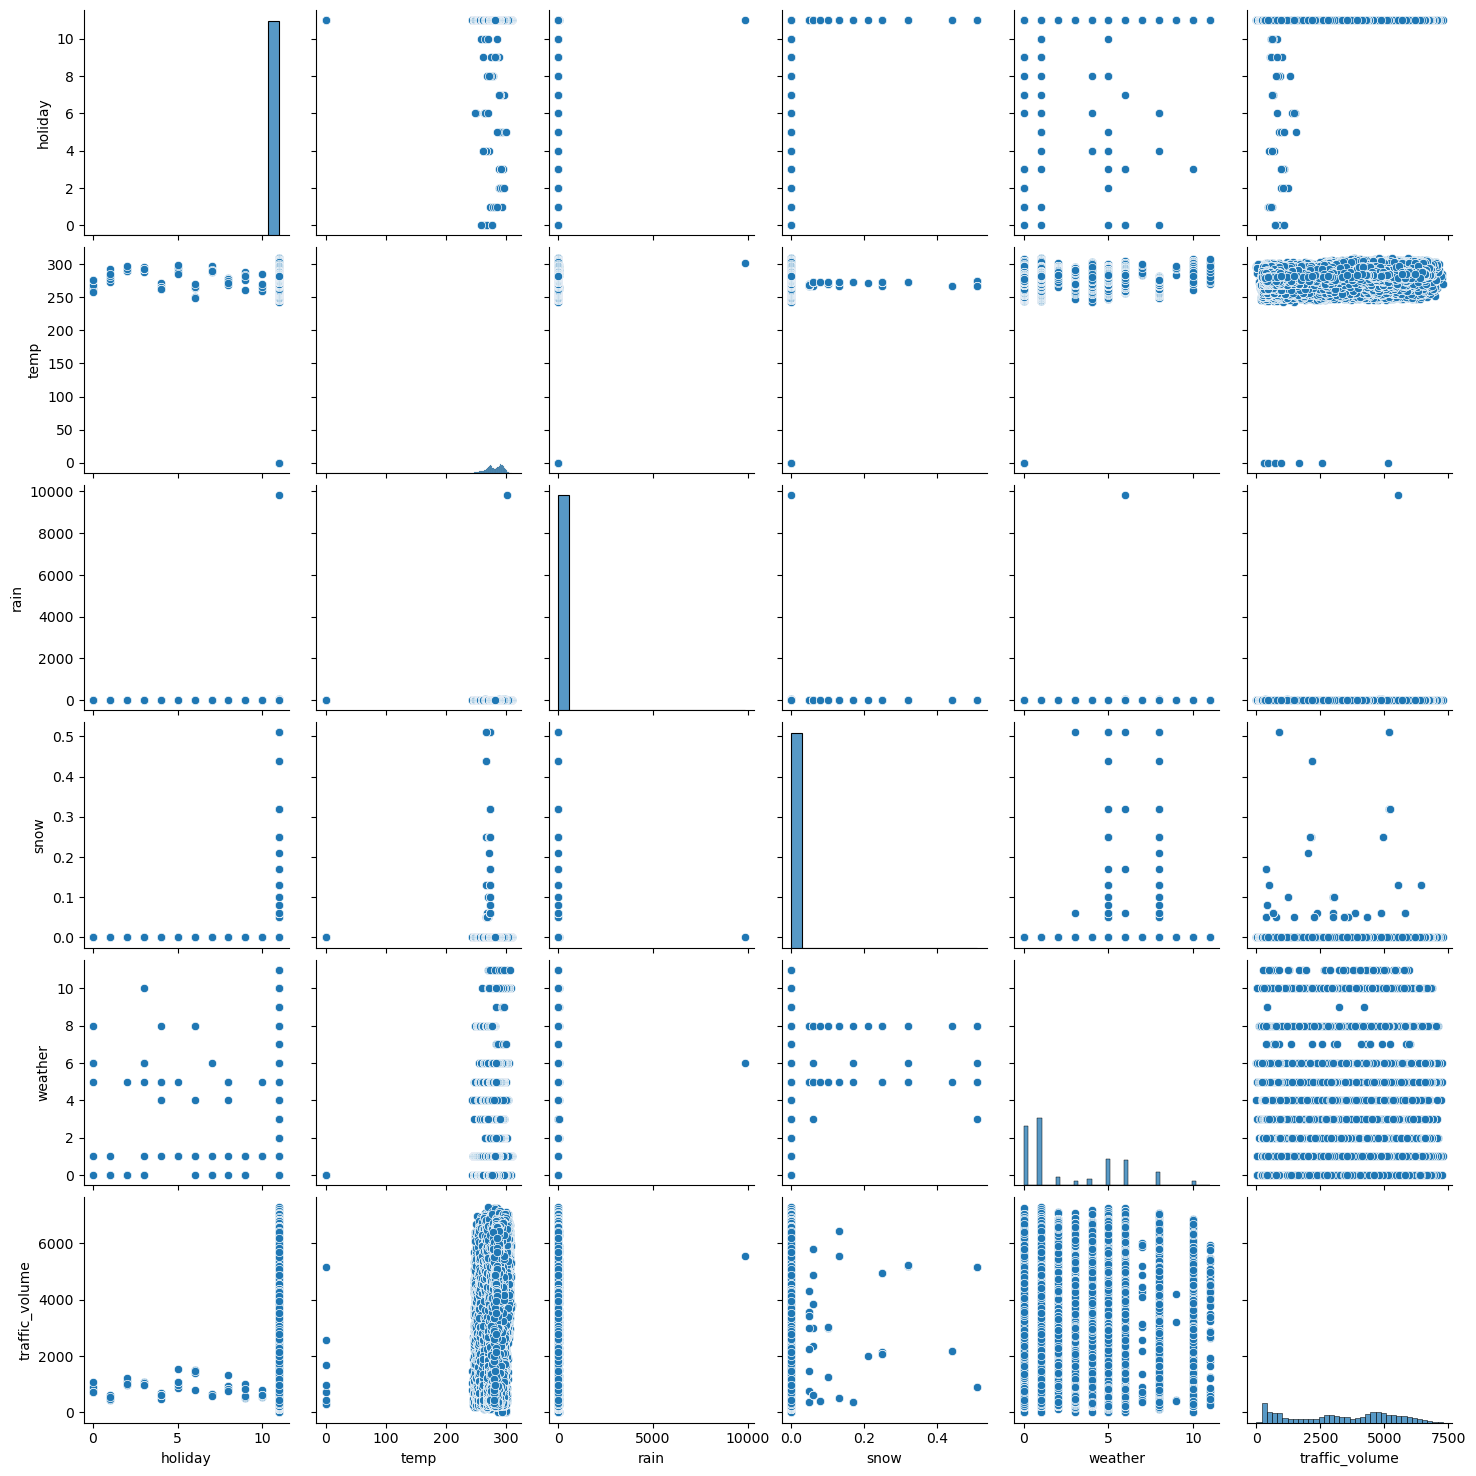

In [17]:
sns.pairplot(data)

<Axes: >

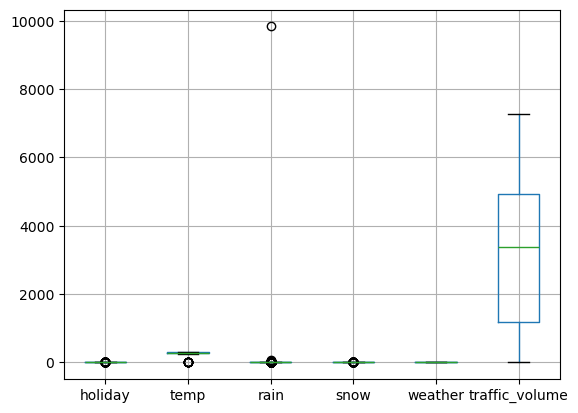

In [21]:
data.boxplot()

In [23]:
data[["day","month","year"]] = data["date"].str.split("-", expand = True)

In [24]:
data[["hours","minutes","second"]] = data["Time"].str.split(":", expand = True)

In [26]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [27]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,second
0,11,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,11,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,11,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,11,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,11,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [ ]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'],axis=1)

In [ ]:
names = x.columns

In [34]:
from sklearn.preprocessing import scale
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'],axis=1)
names = x.columns
x = pd.DataFrame(x,columns=names)
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,second
0,11,288.28,0.0,0.0,1,02,10,2012,09,00,00
1,11,289.36,0.0,0.0,1,02,10,2012,10,00,00
2,11,289.58,0.0,0.0,1,02,10,2012,11,00,00
3,11,290.13,0.0,0.0,1,02,10,2012,12,00,00
4,11,291.14,0.0,0.0,1,02,10,2012,13,00,00


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state =0)

In [ ]:
from sklearn import linear_model
from sklearn import tree 
from sklearn import ensemble
from sklearn import svm
import Xgboost
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegression()
Rand = ensemble.RandomForestRegression()
svr = svm.SVR()
XGB = Xgboost.XGBRegression()
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)
from sklearn import metrics
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

In [ ]:
MSE = metrics.mean_squared_error(p3,y_test)
np.sqrt(MSE)

In [51]:
import pickle as pk

In [ ]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))